In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.DataFrame(pd.read_csv('train.csv'))
#train_df.Survived.value_counts().idxmax()

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# DV = Survived 

In [5]:
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
len(train_df)

891

In [8]:
# 1. Missing Value Treatment
train_df.isnull().sum()/len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# How to do Missing value Treatment 
# 1. if missing percentage of any varaible is more than 50percent we drop that variable 
# 2. if missing percentage is less than 50 
#     a. if the varibale is object then we replace missing value with mode
#     b. if the variable is numeric and if we have outlier in the variable replace missing with median 
#     c. else if the variable is numeric with no outlier replace the missing value with mean 

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


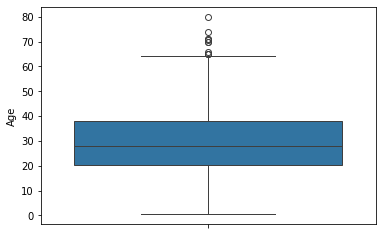

In [11]:
sns.boxplot(train_df['Age'])
plt.show()

Cabin - drop the variable 

Age - replace the missing with median 

Embarked - replace the missing with mode 

In [12]:
train_df.drop('Cabin',axis = 1,inplace = True)

In [13]:
train_df.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [14]:
train_df.Age.fillna(28,inplace =True)

In [15]:
train_df.Embarked.fillna('S',inplace =True)

In [16]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_df = train_df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# EDA

In [22]:
final_train = pd.get_dummies(train_df, columns=['Sex','Embarked'])

In [35]:
final_train[['Sex_female',"Sex_male","Embarked_C",'Embarked_Q',"Embarked_S"]] = final_train[['Sex_female',"Sex_male","Embarked_C",'Embarked_Q',"Embarked_S"]].astype('int')

In [36]:
final_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [37]:
from statsmodels.tools import add_constant as add_constant
final_train_constant = add_constant(final_train)
final_train_constant.head()

,const,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1.0,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1.0,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1.0,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,1.0,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [38]:
# Fitting the model 
X = final_train_constant.drop('Survived',axis=1)
y = final_train_constant['Survived']


In [39]:
 # Train And Test
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [40]:
# Model Building 
import statsmodels.api as sm

modelll = sm.Logit(y_train,x_train).fit()


Optimization terminated successfully.
         Current function value: 0.439789
         Iterations 7


In [41]:
print(modelll.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3432
Time:                        15:49:40   Log-Likelihood:                -313.13
converged:                       True   LL-Null:                       -476.73
Covariance Type:            nonrobust   LLR p-value:                 6.588e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7892        nan        nan        nan         nan         nan
Pclass        -1.0370      0.166     -6.249      0.000      -1.362      -0.712
Age           -0.0302      0.009     -3.456      0.0

**Model Creation over Test Data**

In [42]:
Y_pred = modelll.predict(x_test)

In [43]:
Y_pred

26     0.125837
121    0.098433
283    0.125346
204    0.128697
628    0.103886
         ...   
418    0.227382
12     0.122070
580    0.812462
136    0.947222
544    0.374724
Length: 179, dtype: float64

In [44]:
y_test

26     0
121    0
283    1
204    1
628    0
      ..
418    0
12     0
580    1
136    1
544    0
Name: Survived, Length: 179, dtype: int64

In [45]:
y_pred_new = np.where(Y_pred > 0.5,1,0)
y_pred_new

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       116
           1       0.67      0.71      0.69        63

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [47]:
y_pred_new = np.where(Y_pred > 0.7,1,0)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       116
           1       0.90      0.57      0.70        63

    accuracy                           0.83       179
   macro avg       0.85      0.77      0.79       179
weighted avg       0.84      0.83      0.82       179



In [49]:
y_pred_new = np.where(Y_pred > 0.3,1,0)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       116
           1       0.57      0.81      0.67        63

    accuracy                           0.72       179
   macro avg       0.72      0.74      0.71       179
weighted avg       0.76      0.72      0.73       179

